In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import os
print(os.listdir("/kaggle/input"))


['neu-surface-defect-database']


In [12]:
DATASET_PATH = "/kaggle/input/neu-surface-defect-database/NEU-DET"
import os
print(os.listdir(DATASET_PATH))


['validation', 'train']


In [13]:
import os, cv2, numpy as np

IMG_SIZE = 128
X_train, y_train = [], []

TRAIN_PATH = DATASET_PATH + "/train"
VALID_EXT = (".jpg", ".jpeg", ".png", ".bmp", ".ppm")

for folder in os.listdir(TRAIN_PATH):
    folder_path = os.path.join(TRAIN_PATH, folder)
    label = 1 if folder == "scratches" else 0

    for root, _, files in os.walk(folder_path):
        for file in files:
            if not file.lower().endswith(VALID_EXT):
                continue

            img_path = os.path.join(root, file)
            image = cv2.imread(img_path)
            if image is None:
                continue

            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_train.append(image)
            y_train.append(label)

X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)

print("Training images loaded:", len(X_train))


Training images loaded: 1440


In [14]:
import os, cv2, numpy as np

IMG_SIZE = 128
X_val, y_val = [], []

VAL_PATH = DATASET_PATH + "/validation"
VALID_EXT = (".jpg", ".jpeg", ".png", ".bmp", ".ppm")

for folder in os.listdir(VAL_PATH):
    folder_path = os.path.join(VAL_PATH, folder)
    label = 1 if folder == "scratches" else 0

    for root, _, files in os.walk(folder_path):
        for file in files:
            if not file.lower().endswith(VALID_EXT):
                continue

            img_path = os.path.join(root, file)
            image = cv2.imread(img_path)
            if image is None:
                continue

            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_val.append(image)
            y_val.append(label)

X_val = np.array(X_val) / 255.0
y_val = np.array(y_val)

print("Validation images loaded:", len(X_val))


Validation images loaded: 360


In [15]:
#building a model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#32 FILTERS 3*3 KERNEL 
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    #2D TO 1D Vectors
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
#ccompiling
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


2025-12-29 08:21:54.360245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766996514.593134      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766996514.660231      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-29 08:22:16.033358: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#train the model 
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 22s 462ms/step - accuracy: 1.0000 - loss: 0.0549 - val_accuracy: 1.0000 - val_loss: 2.6413e-33
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 431ms/step - accuracy: 1.0000 - loss: 1.1650e-35 - val_accuracy: 1.0000 - val_loss: 6.8826e-34
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 433ms/step - accuracy: 1.0000 - loss: 8.8954e-35 - val_accuracy: 1.0000 - val_loss: 6.7734e-34
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 433ms/step - accuracy: 1.0000 - loss: 1.5017e-35 - val_accuracy: 1.0000 - val_loss: 6.7728e-34
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 432ms/step - accuracy: 1.0000 - loss: 1.0023e-34 - val_accuracy: 1.0000 - val_loss: 6.7728e-34


In [18]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(
    classification_report(
        y_val, #actual val
        y_pred, #predicted value
        labels=[0, 1],
        target_names=["No Scratch", "Scratch"],
        zero_division=0
    )
)


Classification Report:
              precision    recall  f1-score   support

  No Scratch       1.00      1.00      1.00       360
     Scratch       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00       360
   macro avg       0.50      0.50      0.50       360
weighted avg       1.00      1.00      1.00       360



Actual label: No Scratch
Predicted label: No Scratch


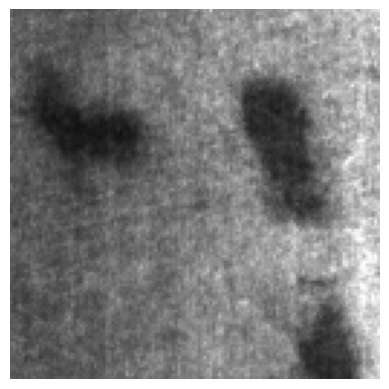

In [20]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, len(X_val)-1)

plt.imshow(X_val[idx])
plt.axis("off")

print("Actual label:", "Scratch" if y_val[idx] == 1 else "No Scratch")
print("Predicted label:", "Scratch" if y_val_pred[idx][0] == 1 else "No Scratch")
